# PaRT

In [1]:
library(rpart)
library(rpart.plot)
# cu.summary


Regression tree:
rpart(formula = Mileage ~ Price + Country + Reliability + Type, 
    data = cu.summary, method = "anova", xval = 100)

Variables actually used in tree construction:
[1] Price Type 

Root node error: 1354.6/60 = 22.576

n=60 (57 observations deleted due to missingness)

        CP nsplit rel error  xerror     xstd
1 0.622885      0   1.00000 1.03419 0.178264
2 0.132061      1   0.37711 0.52891 0.102999
3 0.025441      2   0.24505 0.37410 0.081962
4 0.011604      3   0.21961 0.36115 0.083286
5 0.010000      4   0.20801 0.40397 0.082821
Call:
rpart(formula = Mileage ~ Price + Country + Reliability + Type, 
    data = cu.summary, method = "anova", xval = 100)
  n=60 (57 observations deleted due to missingness)

          CP nsplit rel error    xerror       xstd
1 0.62288527      0 1.0000000 1.0341856 0.17826391
2 0.13206061      1 0.3771147 0.5289135 0.10299941
3 0.02544094      2 0.2450541 0.3741037 0.08196211
4 0.01160389      3 0.2196132 0.3611458 0.08328627
5 0.010000

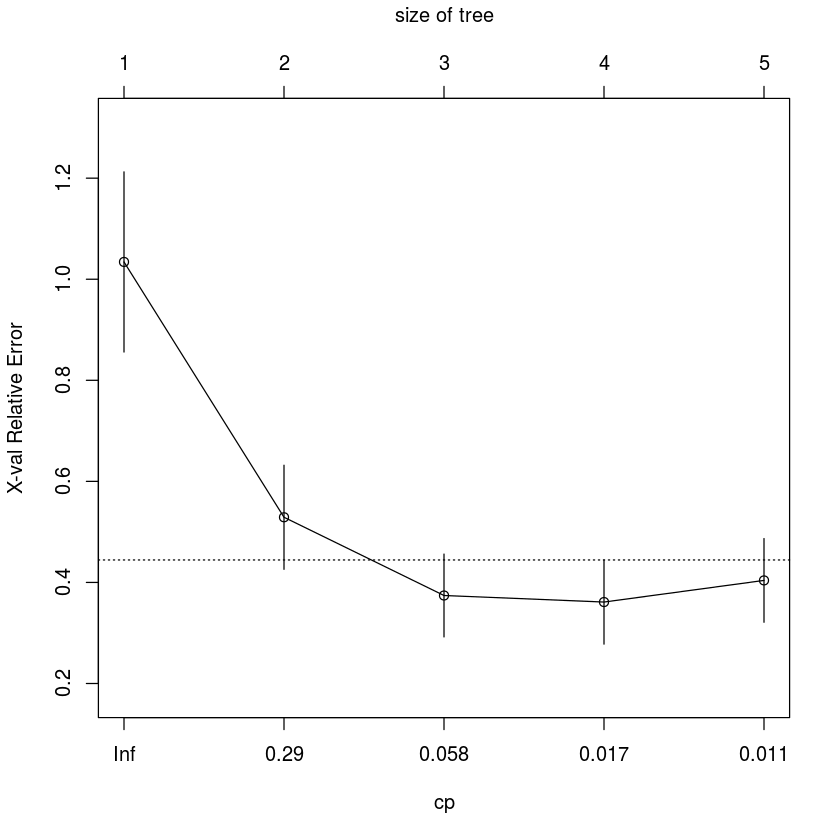

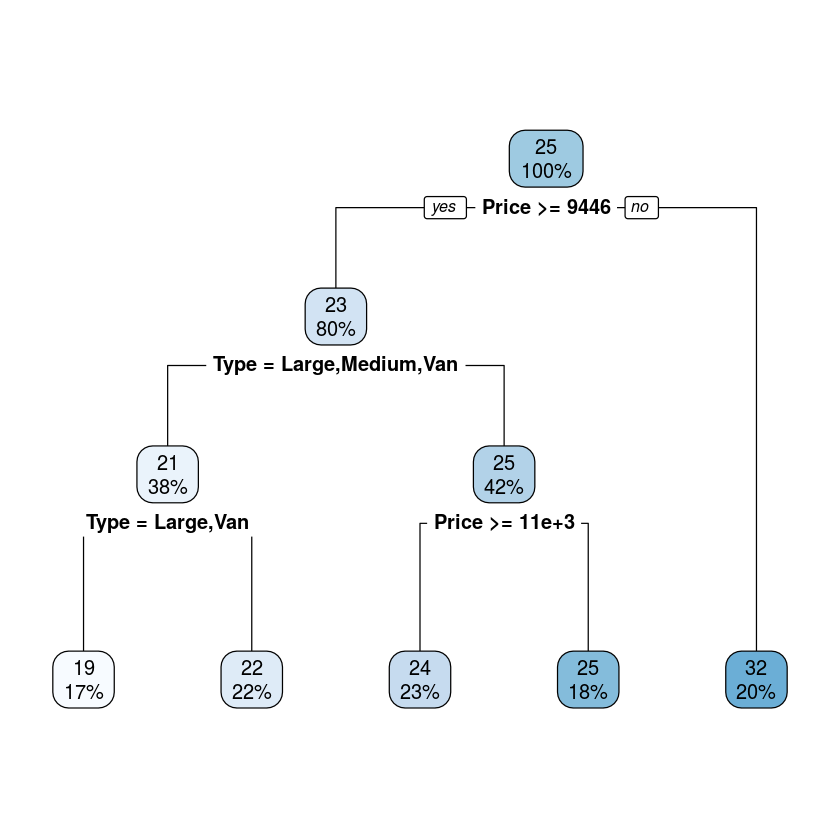

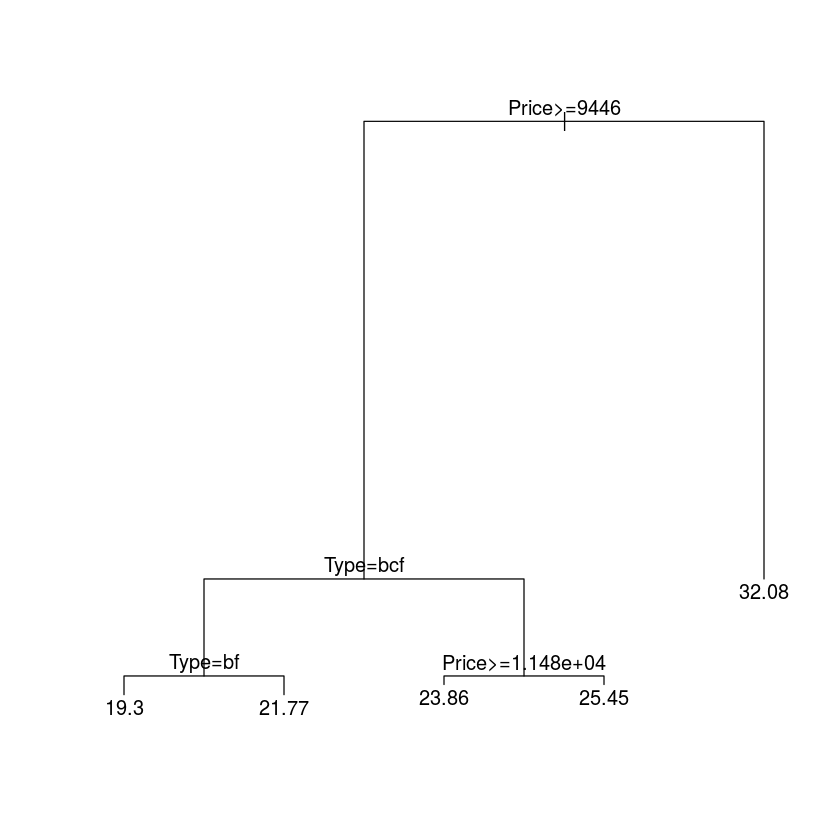

In [2]:
fit <- rpart(Mileage~Price + Country + Reliability + Type, method="anova", xval=100, data=cu.summary)
# Note: If your data are binary and you are interested in performing a classification tree, method =
# “class”
printcp(fit) # display the results
plotcp(fit) # visualize cross-validation results
summary(fit) # detailed summary of splits
# plot tree
rpart.plot(fit) #OR
plot(fit)
text(fit)

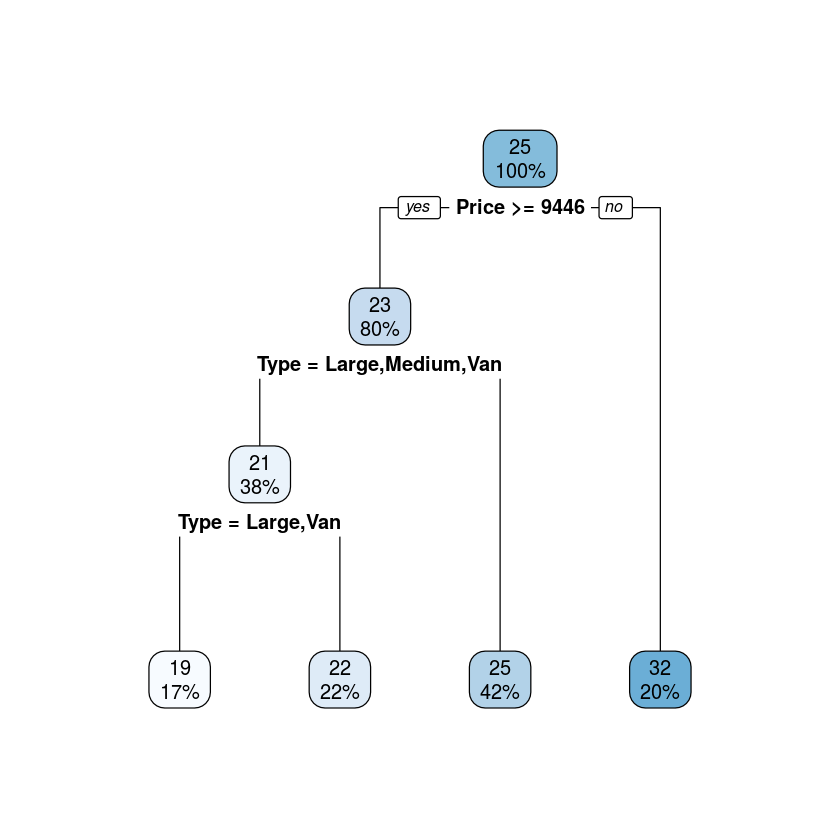

Call:
rpart(formula = Mileage ~ Price + Country + Reliability + Type, 
    data = cu.summary, method = "anova", xval = 100)
  n=60 (57 observations deleted due to missingness)

          CP nsplit rel error    xerror       xstd
1 0.62288527      0 1.0000000 1.0341856 0.17826391
2 0.13206061      1 0.3771147 0.5289135 0.10299941
3 0.02544094      2 0.2450541 0.3741037 0.08196211
4 0.01160389      3 0.2196132 0.3611458 0.08328627

Variable importance
  Price    Type Country 
     48      43       9 

Node number 1: 60 observations,    complexity param=0.6228853
  mean=24.58333, MSE=22.57639 
  left son=2 (48 obs) right son=3 (12 obs)
  Primary splits:
      Price       < 9446.5  to the right, improve=0.6228853, (0 missing)
      Type        splits as  LLLRLL,      improve=0.5044405, (0 missing)
      Reliability splits as  LLLRR,       improve=0.1263005, (11 missing)
      Country     splits as  --LRLRRRLL,  improve=0.1243525, (0 missing)
  Surrogate splits:
      Type    splits as  LLLR

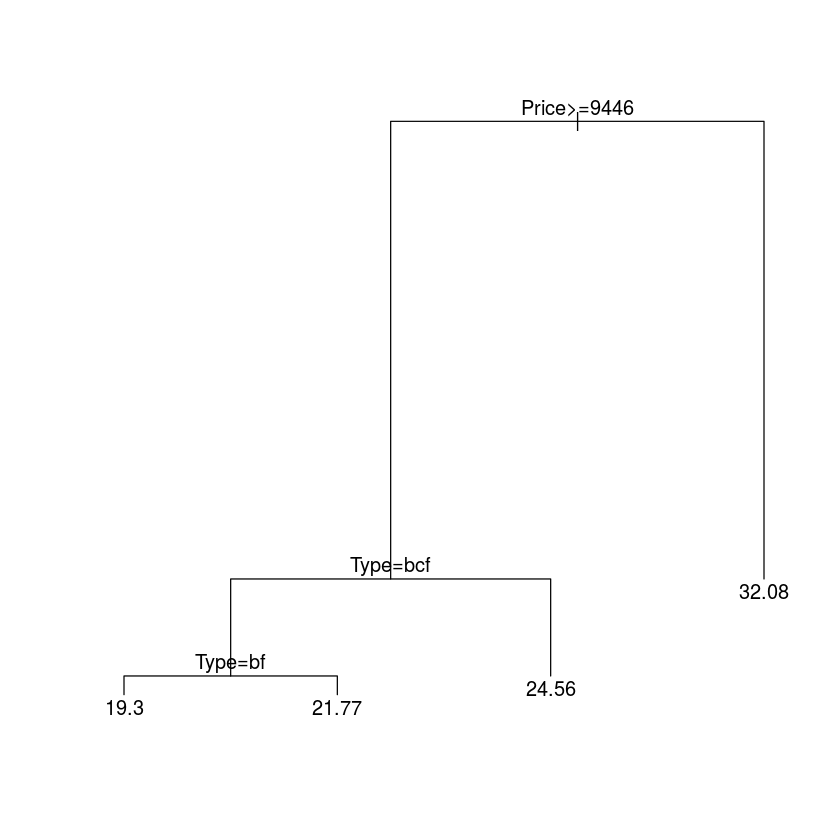

In [3]:
pfit<- prune(fit, cp= fit$cptable[which.min(fit$cptable[,"xerror"]),"CP"])
rpart.plot(pfit)
plot(pfit)
text(pfit)
summary(pfit)

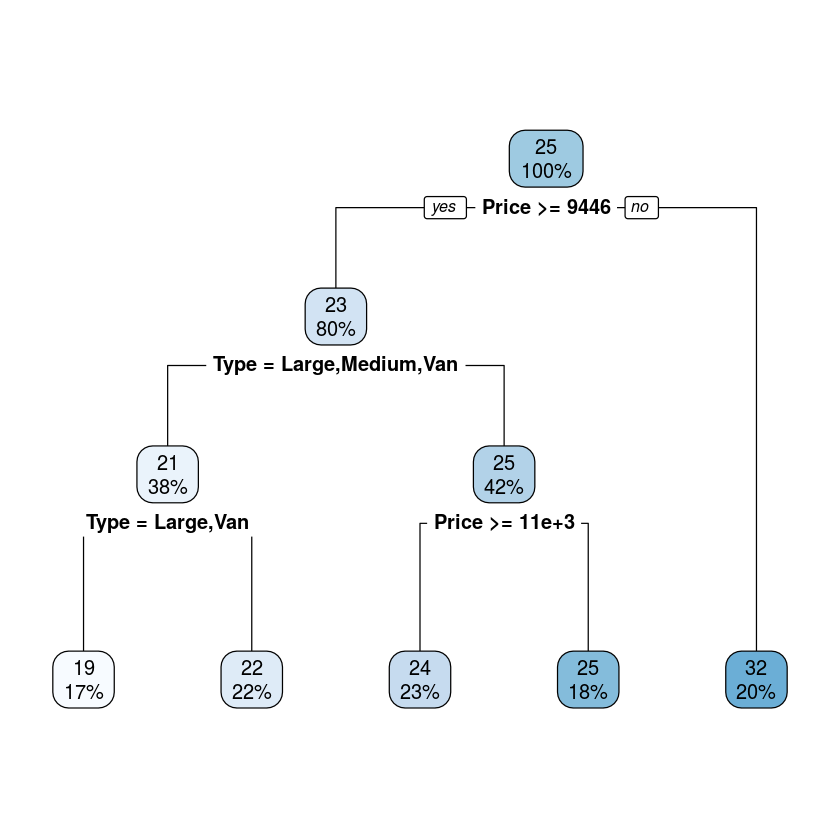

Call:
rpart(formula = Mileage ~ Price + Country + Reliability + Type, 
    data = cu.summary, method = "anova", maxdepth = 3)
  n=60 (57 observations deleted due to missingness)

          CP nsplit rel error    xerror      xstd
1 0.62288527      0 1.0000000 1.0557162 0.1825552
2 0.13206061      1 0.3771147 0.7494820 0.1460803
3 0.02544094      2 0.2450541 0.5773848 0.1264828
4 0.01160389      3 0.2196132 0.5179476 0.1200001
5 0.01000000      4 0.2080093 0.5318184 0.1198333

Variable importance
  Price    Type Country 
     48      42      10 

Node number 1: 60 observations,    complexity param=0.6228853
  mean=24.58333, MSE=22.57639 
  left son=2 (48 obs) right son=3 (12 obs)
  Primary splits:
      Price       < 9446.5  to the right, improve=0.6228853, (0 missing)
      Type        splits as  LLLRLL,      improve=0.5044405, (0 missing)
      Reliability splits as  LLLRR,       improve=0.1263005, (11 missing)
      Country     splits as  --LRLRRRLL,  improve=0.1243525, (0 missing)
  

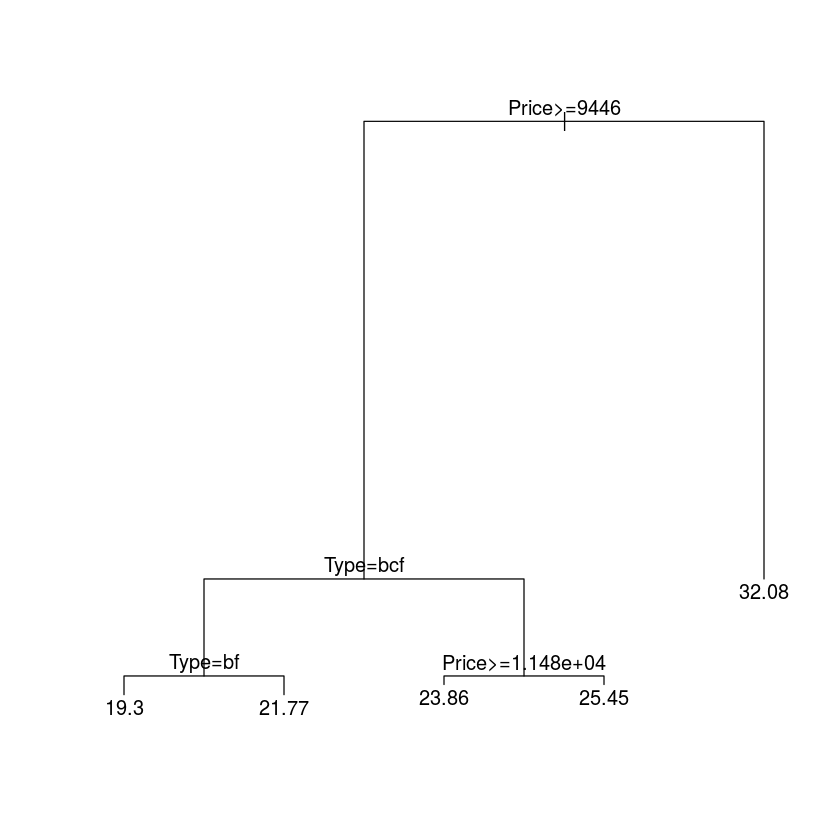

In [4]:
dfit <- rpart(Mileage~Price + Country + Reliability + Type, method="anova", maxdepth=3, data=cu.summary)

rpart.plot(dfit)
plot(dfit)
text(dfit)
summary(dfit)

# MVPaRT Demo

In [5]:
library(ade4)
library(mvpart)
library(vegan)

data(doubs)

env = doubs$env
spe = doubs$fish

spe.norm = decostand(spe, 'hellinger')


Attaching package: ‘mvpart’

The following objects are masked from ‘package:rpart’:

    meanvar, na.rpart, path.rpart, plotcp, post, printcp, prune,
    prune.rpart, rpart, rpart.control, rsq.rpart, snip.rpart,
    xpred.rpart

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-1

Attaching package: ‘vegan’

The following object is masked from ‘package:ade4’:

    cca



X-Val rep : 1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100
Minimum tree sizes
tabmins
 2  4  6  7  8 
13  1  1  3 82 


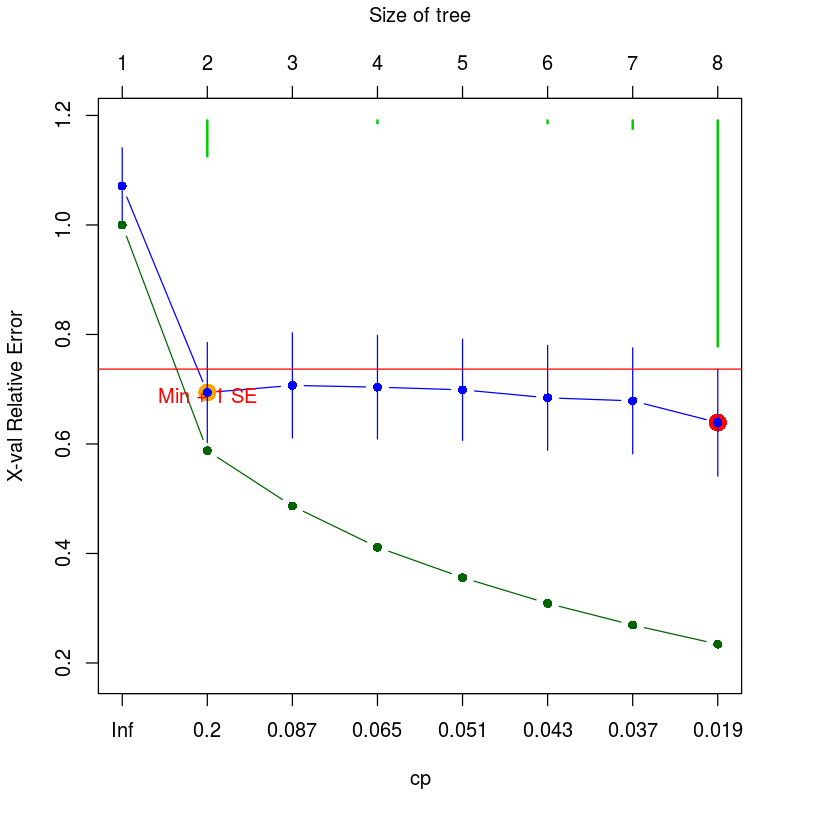

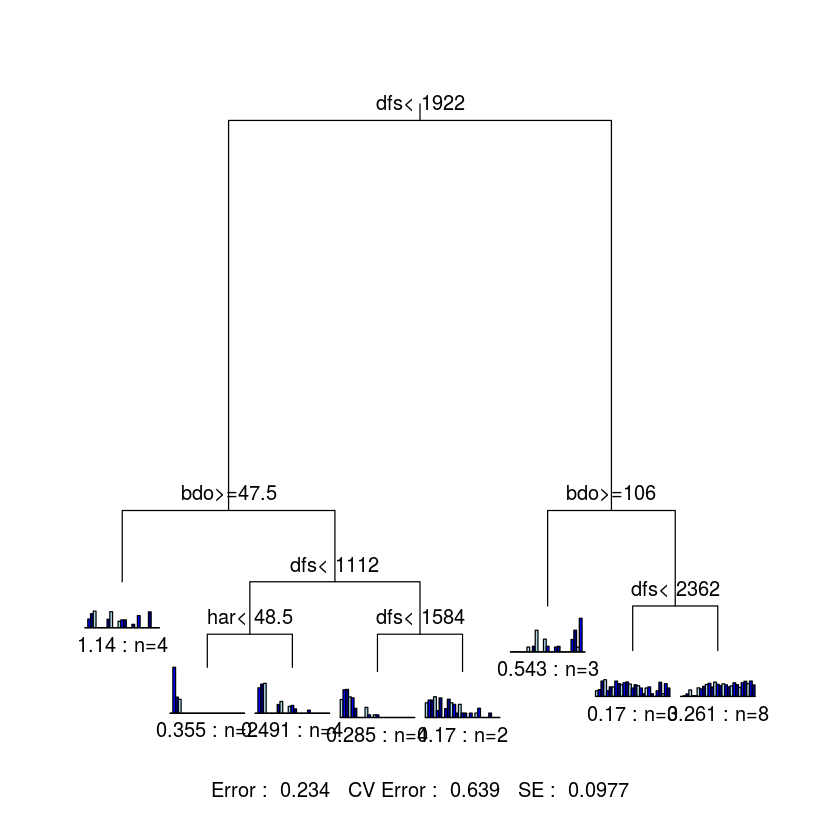

In [6]:
spe.ch.mvpart <- mvpart(data.matrix(spe.norm) ~ ., env, 
                        xv='pick',       # xv="pick", 
                        xval=nrow(spe),  # Does this make this Leave One Out CV?
                        xvmult=100,     
                        which=1)         # 1 for single centered label. 

In [7]:
summary(spe.ch.mvpart)

Call:
mvpart(form = data.matrix(spe.norm) ~ ., data = env, xv = "pick", 
    xval = nrow(spe), xvmult = 100, which = 1)
  n= 30 

          CP nsplit rel error    xerror       xstd
1 0.41239252      0 1.0000000 1.0712391 0.06965067
2 0.10092845      1 0.5876075 0.6939475 0.09134039
3 0.07535509      2 0.4866790 0.7069311 0.09598485
4 0.05540925      3 0.4113239 0.7037457 0.09473744
5 0.04709836      4 0.3559147 0.6988545 0.09239483
6 0.03949680      5 0.3088163 0.6842937 0.09571943
7 0.03500483      6 0.2693195 0.6787091 0.09668688
8 0.01000000      7 0.2343147 0.6390385 0.09768989

Node number 1: 30 observations,    complexity param=0.4123925
  Means=0.07056,0.239,0.2495,0.263,0.06895,0.06585,0.06667,0.07409,0.1439,0.2253,0.1093,0.07617,0.1667,0.132,0.1066,0.07942,0.08459,0.06876,0.07068,0.13,0.06097,0.04276,0.09813,0.18,0.07455,0.1569,0.0704, Summed MSE=0.4855981 
  left son=2 (16 obs) right son=3 (14 obs)
  Primary splits:
      dfs < 1922   to the left,  improve=0.4123925, (0 missi

In [8]:
printcp(spe.ch.mvpart)

mvpart(form = data.matrix(spe.norm) ~ ., data = env, xv = "pick", 
    xval = nrow(spe), xvmult = 100, which = 1)

Variables actually used in tree construction:
[1] bdo dfs har

Root node error: 14.568/30 = 0.4856

n= 30 

        CP nsplit rel error  xerror     xstd
1 0.412393      0   1.00000 1.07124 0.069651
2 0.100928      1   0.58761 0.69395 0.091340
3 0.075355      2   0.48668 0.70693 0.095985
4 0.055409      3   0.41132 0.70375 0.094737
5 0.047098      4   0.35591 0.69885 0.092395
6 0.039497      5   0.30882 0.68429 0.095719
7 0.035005      6   0.26932 0.67871 0.096687
8 0.010000      7   0.23431 0.63904 0.097690


_Stephen Anthony Rose_